In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import wordcloud as wc

## Question: How do people conceptualize the Truth of their perceptions?
## Hypothesis 1: Each individual's (mine and other humans') reality is True
## Hypothesis 2: Reality is True, and each individual has more or less representative sampling of reality
## Hypothesis 3: My Reality is True, but I can't be sure that everyone else's is.

In [137]:
#bs = pd.read_csv(os.getcwd()+"\\beliefs_survey.csv")
#print(bs.columns)
##bs = bs.transpose()#.head()

#hyp_colums = [np.nan, np.nan, 1, 2, 2, 1, 2, 2, 3, 2, 2, 1, np.nan, np.nan, np.nan, np.nan, np.nan]
#q_label = ['subID', 'time', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o']
#cols_dict = {col:(hyp_colums[i], q_label[i]) for i, col in enumerate(bs.columns)}

#melted = pd.melt(bs, id_vars='subject', value_vars=[c for c in bs.columns])#.to_csv(os.getcwd()+'\\test.csv')
##melted.head()
#print(cols_dict.keys())

#hyp_label = [cols_dict[k][0] for k in melted['variable']]
#question_label = [cols_dict[k][1] for k in melted['variable']]
#melted['hypothesis'] = hyp_label
#melted['questions_label'] = question_label

melted = pd.read_csv(os.getcwd()+"\long_format_beliefs_survey.csv")
melted['hypothesis'] = melted['hypothesis'].astype(str)
#melted['value'] = melted['value'].astype(float)
melted = melted.sort_values(['subject','questions_label'])
melted.head()

<>:18: SyntaxWarning: invalid escape sequence '\l'
<>:18: SyntaxWarning: invalid escape sequence '\l'
C:\Users\dillc\AppData\Local\Temp\ipykernel_28020\835453872.py:18: SyntaxWarning: invalid escape sequence '\l'
  melted = pd.read_csv(os.getcwd()+"\long_format_beliefs_survey.csv")


,Unnamed: 0,subject,variable,value,hypothesis,questions_label,dillan_hyp_rate,chiaki_hyp_rate,comments
360,24,0,To what extent do you agree with the statement...,10,1.0,a,NaN,NaN,NaN
336,48,0,"To what extent do you agree: ""My knowledge abo...",5,2.0,b,NaN,NaN,NaN
312,72,0,To what extent do you agree with the statement...,3,2.0,c,NaN,NaN,NaN
288,96,0,To what extent do you agree with the statement...,10,1.0,d,NaN,NaN,NaN
264,120,0,To what extent do you agree with the statement...,3,2.0,e,NaN,NaN,NaN


In [77]:
def elim_punc(w,puncs, w_list=[]):

    if ((len(w)==1) and (w in puncs)) or ('\nhttps://youtu.be/lyu7v7nWzfo?si=9k2wyNyF8FPTN3P_' in w):
        return w_list
    
    else:
        # to initialize while loop
        punc_in_word = 1
        # nest our word into a list
        split = [w]
        while punc_in_word:

            # any of the strings in our list split contain a slash, we want to separate the strings on either side of the slash
            if np.sum([ np.sum([1 if ("\'" in char) else 0 for char in word]) for word in split]) > 0:
                new_split = []
                for word in split:[new_split.append(i) for i in word.split('\'')]
                split = new_split
                
            elif np.sum([ np.sum([1 if ("/" in char) else 0 for char in word]) for word in split]) > 0:
                new_split = []
                for word in split:[new_split.append(i) for i in word.split('/')]
                split = new_split
            else:
                split = [(''.join(char for char in word if char not in puncs)) for word in split]
            
            #print(split)
            for s in split:
                if s == '':
                    continue
                else:
                    if np.sum([ np.sum([1 if (char in puncs) else 0 for char in word]) for word in split]) > 0:
                        punc_in_word = 1
                    else:
                        punc_in_word = 0 

        for s in split: w_list.append(s) 

        return w_list

def check_duplicate(word, all_words, exceptions=[]):
    # checking to see if we have already recorded this word,
    # and catch cases where the word has already been recorded but we have a plural case 
    duplicate = False
    #print(word)
    if (word[-1] == "s") and (word not in exceptions):
        #print(word)
        singular = word[:-1]
    else:
        singular = word

    for other in all_words:
        if (word==other) or ((word[:-1]==other) and (word[-1]=='s')) or ((other[:-1] == word) and (other[-1]=='s')): 
            duplicate = True

    return duplicate, singular

def get_word_frequency(sentences):

    puncs = [',','-','--', '?', '\'', '/', "!", '"', "'", '.', "(", ")",'\n',]
    articles= ['as', 'a', 'the', 'in', 'of', 'with', 'it','or','if','on', 'my',
                'from', 'out', 'and', 'but', 'i', 'this', 'are','about',
                'is', 'has', 'to', 'that', 'have']
    s_exceptions = ['previous', 'is', 'inconsistencies']
    freqs_dict = {}

    for s in sentences:
        #print(s)
        words = s.split(' ')
        w_list = []
        for w in words:
            if w == '':
                continue
            else:
                w_list = elim_punc(w,puncs,w_list)

        #print(w_list)
        for t in w_list:
            t = t.lower()
            if (t in articles) or (t==''):
                continue
            else:
                duplicate, singular = check_duplicate(t, list(freqs_dict.keys()), s_exceptions)
                if not duplicate:
                    freqs_dict[singular] = 1
                else:
                    freqs_dict[singular] = freqs_dict[singular]+1
    return freqs_dict

In [78]:
puncs = [',', '?', '\'', '/', "!", '"', '.', "(", ")", str("")]
w_list = []
w = 'idea”'
elim_punc(w, puncs, w_list=[])

['idea”']

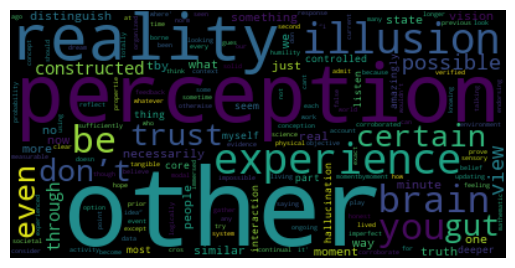

In [164]:
illusionVreality = melted[melted['questions_label']=='k']
resps_list = list(illusionVreality['value'].dropna())
#[resps_list[i].split(' ') for i in range(len(resps_list))]
#print(resps_list[-2])
illusionVreality_dict = get_word_frequency(resps_list)

cloud = wc.WordCloud()
cloud.generate_from_frequencies(illusionVreality_dict)
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

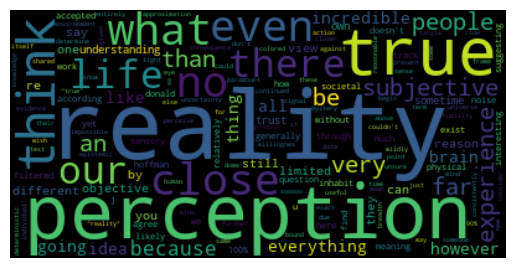

In [166]:
illusionVreality = melted[melted['questions_label']=='n']
resps_list = list(illusionVreality['value'].dropna())
[resps_list[i].split(' ') for i in range(len(resps_list))]
#print(resps_list)

illusionVreality_dict = get_word_frequency(resps_list)

cloud = wc.WordCloud()
cloud.generate_from_frequencies(illusionVreality_dict)
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

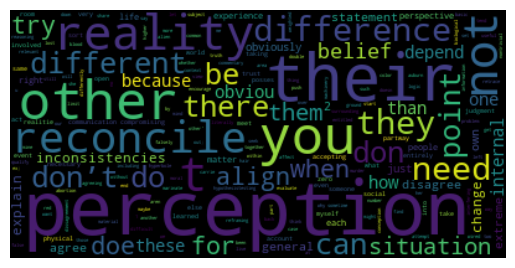

In [167]:
illusionVreality = melted[melted['questions_label']=='m']
resps_list = list(illusionVreality['value'].dropna())
[resps_list[i].split(' ') for i in range(len(resps_list))]
#print(resps_list)

illusionVreality_dict = get_word_frequency(resps_list)

cloud = wc.WordCloud()
cloud.generate_from_frequencies(illusionVreality_dict)
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

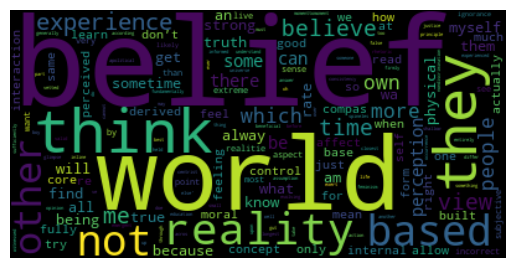

In [170]:
illusionVreality = melted[melted['questions_label']=='l']
resps_list = list(illusionVreality['value'].dropna())
[resps_list[i].split(' ') for i in range(len(resps_list))]
#print(resps_list)

illusionVreality_dict = get_word_frequency(resps_list)

cloud = wc.WordCloud()
cloud.generate_from_frequencies(illusionVreality_dict)
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [138]:
numerical_qs = melted[melted['hypothesis']!='nan'].dropna(subset=['value'])
numerical_qs['value'] = numerical_qs['value'].astype(int)
numerical_qs.head()

,Unnamed: 0,subject,variable,value,hypothesis,questions_label,dillan_hyp_rate,chiaki_hyp_rate,comments
360,24,0,To what extent do you agree with the statement...,10,1.0,a,NaN,NaN,NaN
336,48,0,"To what extent do you agree: ""My knowledge abo...",5,2.0,b,NaN,NaN,NaN
312,72,0,To what extent do you agree with the statement...,3,2.0,c,NaN,NaN,NaN
288,96,0,To what extent do you agree with the statement...,10,1.0,d,NaN,NaN,NaN
264,120,0,To what extent do you agree with the statement...,3,2.0,e,NaN,NaN,NaN


<Axes: xlabel='hypothesis', ylabel='value'>

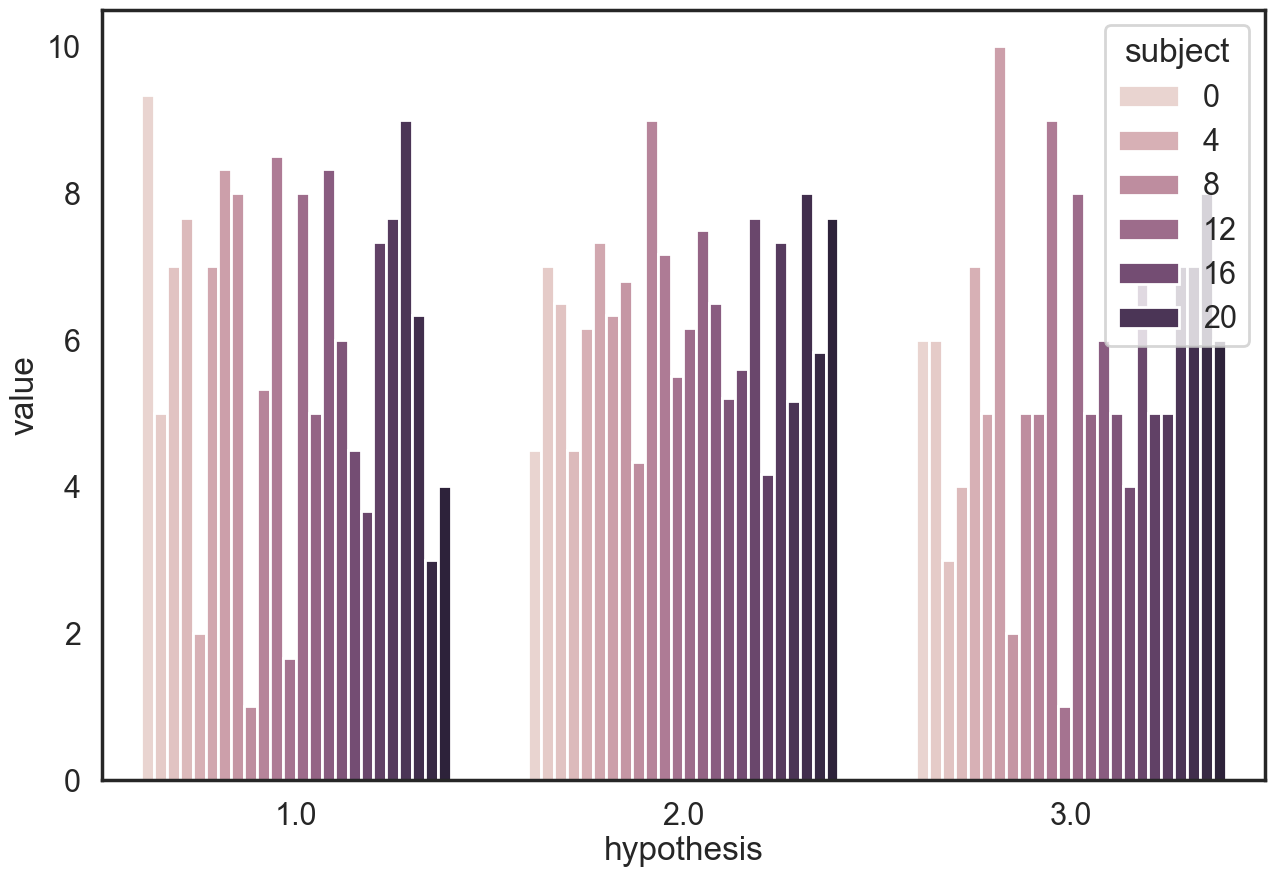

In [139]:
fig,ax = plt.subplots(figsize=(15,10))
sns.barplot(data=numerical_qs, y='value', x='hypothesis', hue='subject',errorbar=None, ax=ax)

C:\Users\dillc\AppData\Local\Temp\ipykernel_28020\3788258841.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a = sns.boxplot(data=numerical_qs, x='hypothesis', y='value', ax=ax, palette=sns.color_palette("Set2"))
C:\Users\dillc\AppData\Local\Temp\ipykernel_28020\3788258841.py:4: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  a = sns.boxplot(data=numerical_qs, x='hypothesis', y='value', ax=ax, palette=sns.color_palette("Set2"))


Text(0, 0.5, 'agreement rating')

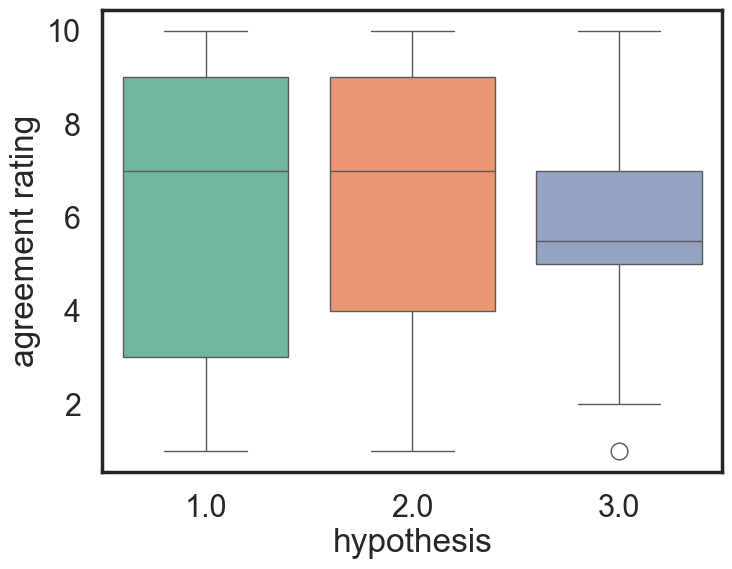

In [142]:
fig,ax = plt.subplots(figsize=(8,6))
sns.set_theme('poster')
sns.set_style('white')
a = sns.boxplot(data=numerical_qs, x='hypothesis', y='value', ax=ax, palette=sns.color_palette("Set2"))
a.set_ylabel("agreement rating")


(0.0, 11.0)

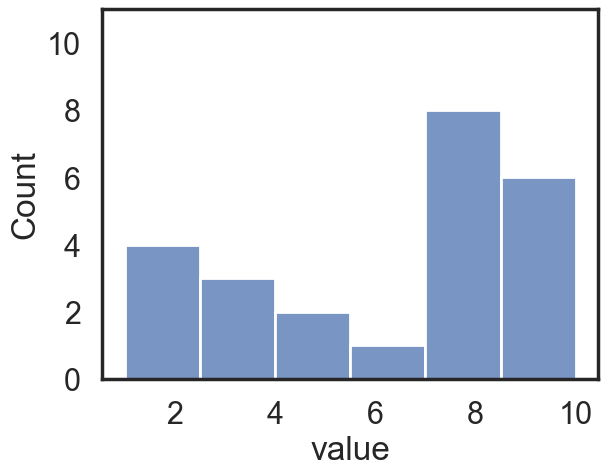

In [163]:
subset_q = numerical_qs[numerical_qs['questions_label']=='a']
a = sns.histplot(data=subset_q, x='value')
a.set_ylim(0,11)